MULtIcollinearity

THIS  problem  can be solved by 3 methods
1. VIF = ( variance inflation fector)
2. RFE= (recursive feature elimination)
3. clustermap

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [73]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [74]:
from sklearn.datasets import fetch_california_housing


In [75]:
data = fetch_california_housing()

data.data
data.target
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [76]:
df= pd.DataFrame(data.data, columns=data.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


# CLUSTERMAP
 clustermap shows the collinearity between the features and the dendograms lenths shows its magnitude

<Figure size 500x500 with 0 Axes>

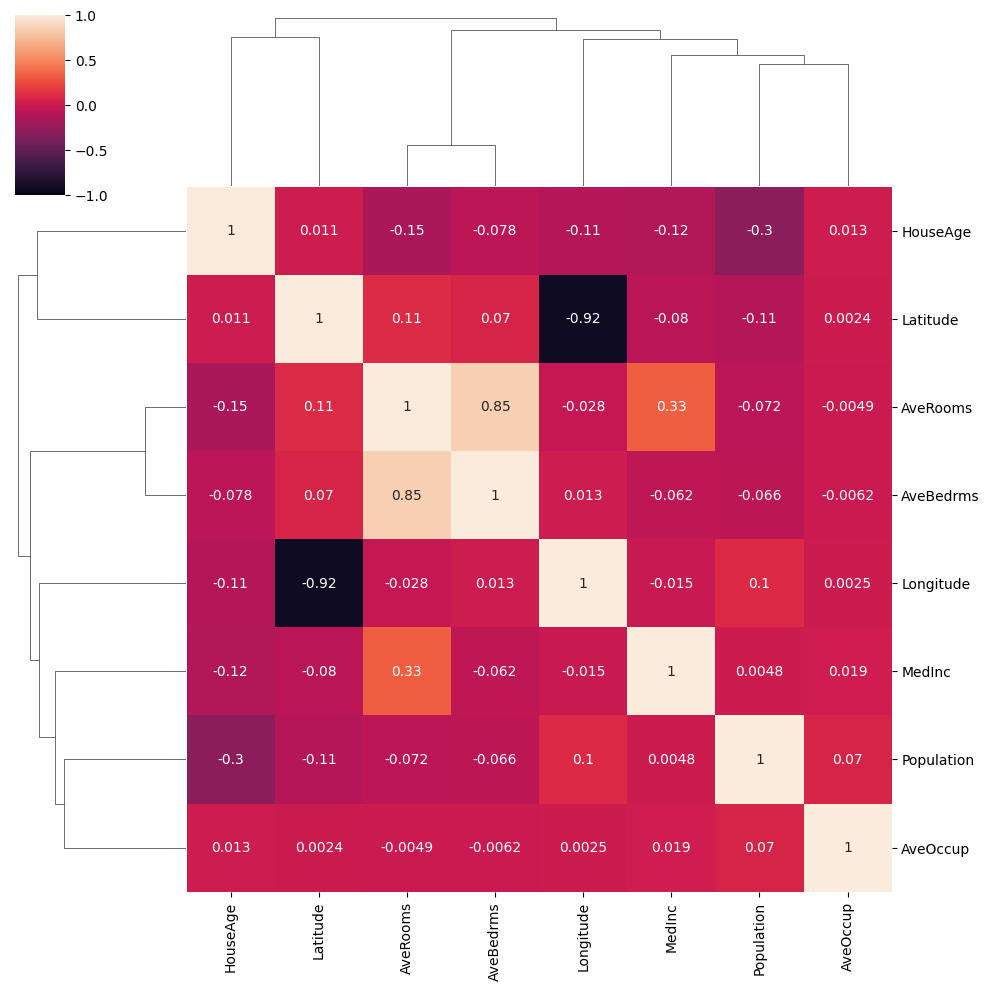

In [77]:
plt.figure(figsize=(5,5))

sns.clustermap(df.corr(), vmin=-1, vmax=1, annot=True)

# VIF (variance inflation fector)

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
vif = pd.DataFrame()

In [80]:
vif = pd.DataFrame()

vif["feature"] = df.columns
\
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
vif

,feature,VIF
0,MedInc,11.511140
1,HouseAge,7.195917
2,AveRooms,45.993601
3,AveBedrms,43.590314
4,Population,2.935745
5,AveOccup,1.095243
6,Latitude,559.874071
7,Longitude,633.711654


In [81]:
df.drop("AveRooms", axis=1, inplace =True)

In [82]:
vif2 = pd.DataFrame()
vif2["feature"]= df.columns
vif2["VIF"]=[variance_inflation_factor(df.values,i) for i in range (len(df.columns))]
vif2

,feature,VIF
0,MedInc,5.392443
1,HouseAge,7.113222
2,AveBedrms,6.475227
3,Population,2.928530
4,AveOccup,1.095013
5,Latitude,524.622111
6,Longitude,581.335288


In [83]:
vif3 = pd.DataFrame()
vif3["feature"]= df.columns
vif3["VIF"]=[variance_inflation_factor(df.values,i) for i in range (len(df.columns))]
vif3

,feature,VIF
0,MedInc,5.392443
1,HouseAge,7.113222
2,AveBedrms,6.475227
3,Population,2.928530
4,AveOccup,1.095013
5,Latitude,524.622111
6,Longitude,581.335288


SINCE ALL THE VIF VALUES ARE LESS THAN 10 SO , WE CAN MAKE THE MODEL NOW

# REF(reccursive feature elimination)

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


x= df.iloc[:,:-2]
y= df["Population"]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

rfe= RFE(LinearRegression(), n_features_to_select=5 )
rfe.fit(x_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [91]:
rfe.support_

array([ True,  True,  True,  True,  True])

In [92]:
x.columns

Index(['MedInc', 'HouseAge', 'AveBedrms', 'Population', 'AveOccup'], dtype='object')

#it shows that all the columns are selected here